In [1]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv('/Users/juhimishra/Downloads/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# EDA

In [4]:
df.shape

(1000, 40)

no of rows - 1000
no of columns - 40

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Showing no null values except _c39 may data entered by mistake so will delete this column as this column is nill

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


with the help of static data analysed the following points:
1. No missing data in any of the continous column
2. mean and std columns seems to have some skewness will check through skew method
3. age as we can see that min age of insured customer is 19 as this is an automibile insuarance claim so age limit for
   driving starts from 18+ that we can see here and max is 64 
4. here auto year too we can see that starts 1995 and end is 2015

In [7]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Here also not having any missing data except _c39

In [8]:
# Check the name of coloumns which contain string
df.select_dtypes(include='object').columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [9]:
# Checking length
len(df.select_dtypes(include='object').columns)

21

In [10]:
# Check the name of coloumns which contain numerical value
df.select_dtypes(include=['int64', 'float64']).columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', '_c39'],
      dtype='object')

In [11]:
# Checking Length
len(df.select_dtypes(include=['int64', 'float64']).columns)

19

In [12]:
df["fraud_reported"].unique()

array(['Y', 'N'], dtype=object)

In [13]:
df['fraud_reported'].value_counts().to_frame('fraud_reported')

,fraud_reported
N,753
Y,247


no fraud record is 753 and fraudleny records are 247 so showing an imbalance data

In [14]:
df = df.replace('?',np.NaN)

above we seen no null values were showing as there were ? marks instead of nan so replaced all the ? mark to nan and then will replace as
per the requirement

In [15]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Here we got null values in 3 columns after replacing to nan

In [16]:
df.drop(columns=['_c39'],inplace=True)

In [17]:
# missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)

df.isnull().any().any()

False

In [18]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Using visualization method will analyze the insights of data

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

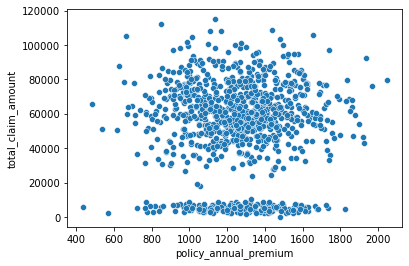

In [19]:
sns.scatterplot(x = 'policy_annual_premium',y = 'total_claim_amount',data=df)

from above graph we can analyze that most of the annual premium falls under range starts from Rs.800 to Rs.1800 and claim 
amount starts from 40000 to 100000

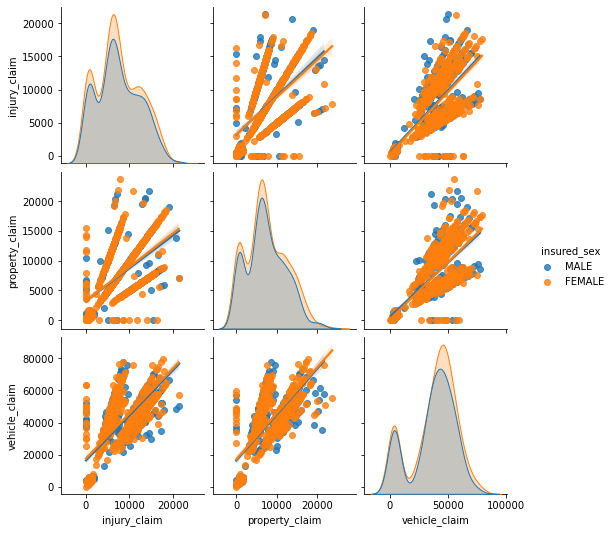

In [20]:
sns.pairplot(df,vars = ["injury_claim", "property_claim", "vehicle_claim"],hue ='insured_sex',kind = 'reg')

From above pairplot we can see that each feature sharing some relation with each other . And as compare to male female 
claim are on higher side 

In [21]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

Compare to male no of female are more who are insured. Will plot the same for more clarification

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

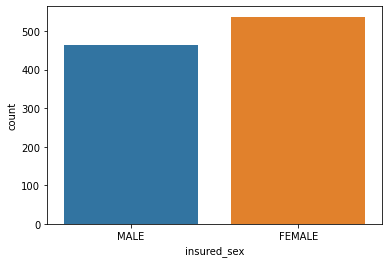

In [22]:

sns.countplot(df.insured_sex)

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

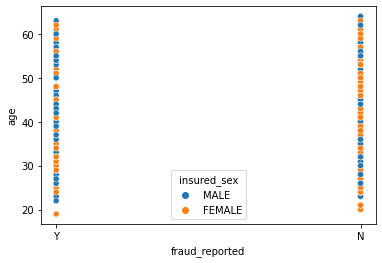

In [23]:
sns.scatterplot(x = 'fraud_reported',y = 'age',hue = 'insured_sex',data=df)

Max fraud report are against male as per the above graph we can easily identify this.

<Figure size 4320x1080 with 0 Axes>

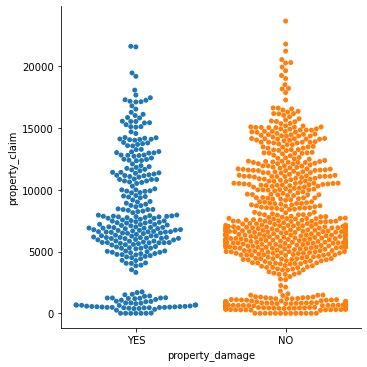

In [24]:
plt.figure(figsize=(60,15))
sns.catplot(x = 'property_damage',y = 'property_claim',data=df,kind='swarm')

Here the ratio of no for property damage vs claim are more compare to yes that means for property damage claim has been made 
and in good ration as between yes and no there are not much gap 

In [25]:
df['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

<Figure size 1800x720 with 0 Axes>

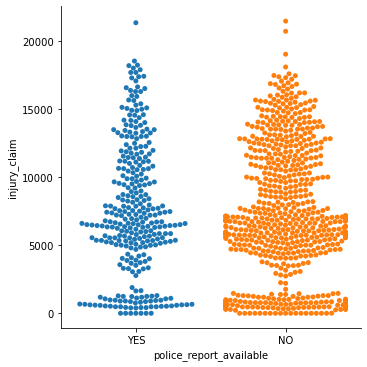

In [26]:
plt.figure(figsize=(25,10))
sns.catplot(x = 'police_report_available',y = 'injury_claim',data=df,kind='swarm')

almost both are showing same ratio of difference that means for most of the claim fir has been done and provided to insuarance company for claim

<AxesSubplot:xlabel='incident_type', ylabel='vehicle_claim'>

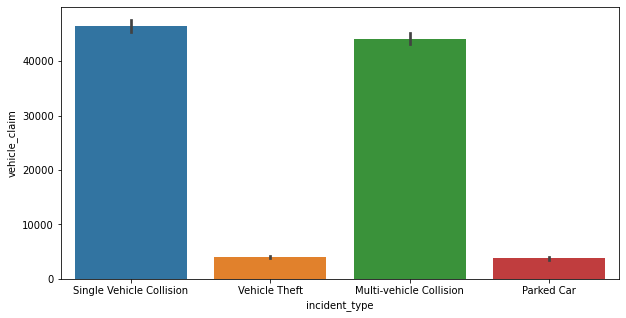

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x='incident_type',y='vehicle_claim',data=df)

vehicle claim for single vehicle collision and multivehicle collision are more 

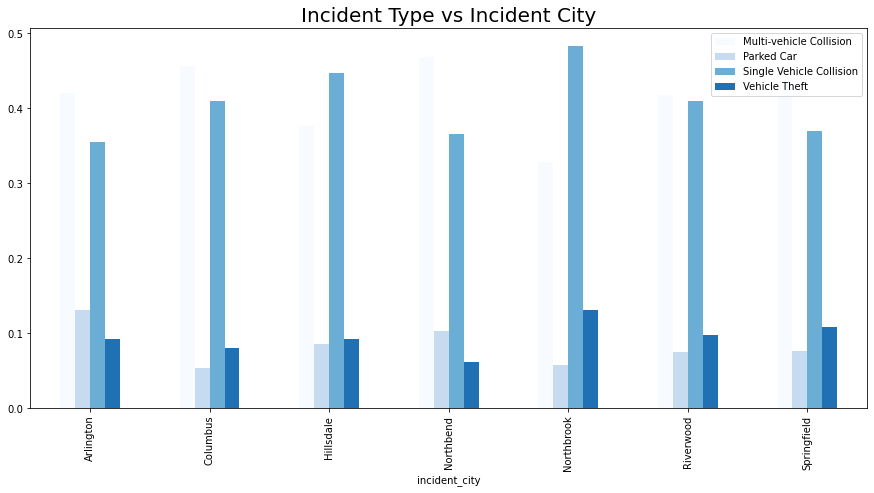

In [28]:
incident = pd.crosstab(df['incident_city'], df['incident_type'])
colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Incident City', fontsize = 20)
plt.legend()
plt.show()

in northbrook most of the cases of single vehicle collision cases happene and the lowest case was parked car even most of the vehicle 
theft cases happened in this city only while most of the multi vehicle collision was in hillsdale

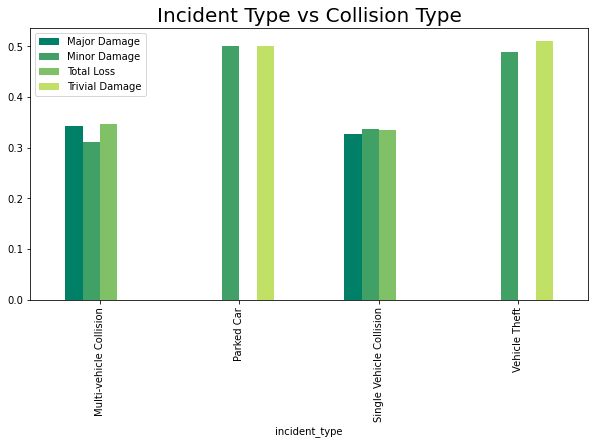

In [29]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (10, 5),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

Most of the major damage happened for parked car and vehicle theft same for trival damage too . While for multi vehicle collision
and single vehicle collision except trival damage all other three damages were at same label.

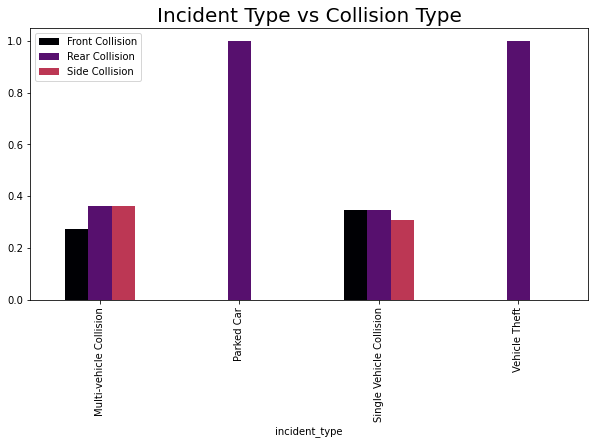

In [31]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = False,
                                                           figsize = (10, 5),
                                                           color = colors)

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

Rear collision for parked car and vehicle theft are at higher side compare to others and even in these we can see that except
this collision no other collision occured

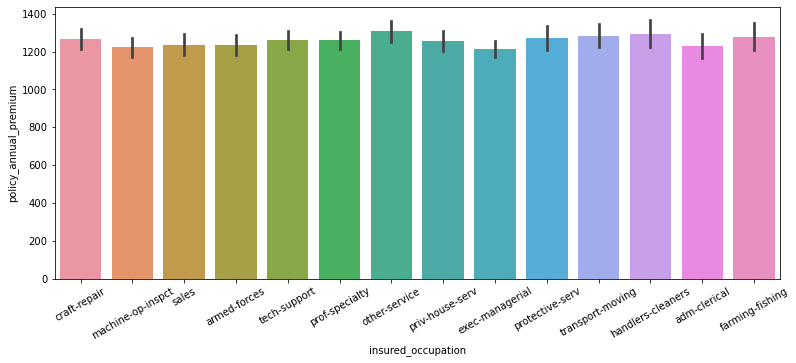

In [32]:
plt.figure(figsize=(13,5))
sns.barplot(x='insured_occupation',y='policy_annual_premium',data=df)
plt.xticks(rotation=30) # rotate axis text
plt.show()

almost premium for all the profession are in same range not much difference we can see between them

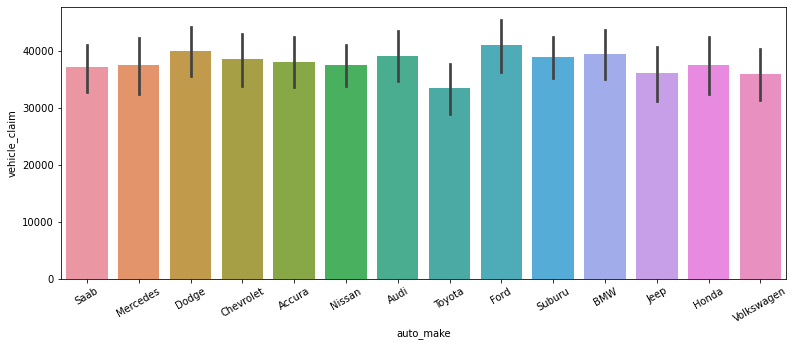

In [33]:
plt.figure(figsize=(13,5))
sns.barplot(x='auto_make',y='vehicle_claim',data=df)
plt.xticks(rotation=30) # rotate axis text
plt.show()

claim for ford are higher . Simultaniously we ca see that there are not much differences of vehicle claim among other companies
except toyota which is having lowest claim compare to others

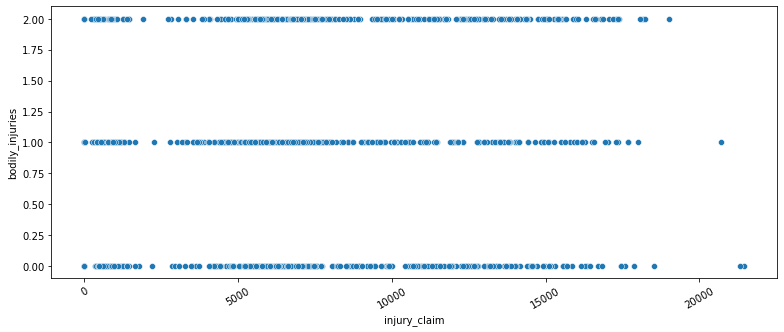

In [34]:
plt.figure(figsize=(13,5))
sns.scatterplot(x='injury_claim',y='bodily_injuries',data=df)
plt.xticks(rotation=30) # rotate axis text
plt.show()

for bodily injuries overall claim made was on an average upto 20K but in some cases it exceeded may be due to seviuor damage

# Feature Engineering

In [35]:
# Converting object to date format
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [36]:
df['Year'] =df['policy_bind_date'].dt.year
df['Month']=df['policy_bind_date'].dt.month
df['Day']=df['policy_bind_date'].dt.day

In [37]:
df['incident_date']=pd.to_datetime(df['incident_date'])

In [38]:
df['Year_id'] = df['incident_date'].dt.year
df['Month_id']=df['incident_date'].dt.month
df['Day_id']=df['incident_date'].dt.day

In [39]:
# Dropping policy bind date as segregatted date month and year 
df.drop(columns=['policy_bind_date','incident_date'],inplace= True)

In [40]:
df.shape

(1000, 43)

In [41]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Year,Month,Day,Year_id,Month_id,Day_id
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17,2015,1,25
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27,2015,1,21
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,6,9,2015,2,22
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,10,1
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,2015,2,17


In [42]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [43]:
print(df['policy_csl'].unique())
print(df['insured_sex'].unique())
print(df['insured_education_level'].unique())
print(df['insured_occupation'].unique())
print(df['insured_hobbies'].unique())
print(df['insured_relationship'].unique())
print(df['incident_type'].unique())
print(df['collision_type'].unique())
print(df['incident_severity'].unique())
print(df['authorities_contacted'].unique())
print(df['incident_state'].unique())
print(df['incident_city'].unique())
print(df['property_damage'].unique())
print(df['police_report_available'].unique())
print(df['auto_make'].unique())
print(df['auto_model'].unique())

['250/500' '100/300' '500/1000']
['MALE' 'FEMALE']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
['Side Collision' 'Rear Collision' 'Front Collision']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
['Police' 'None' 'Fire' 'Other' 'Ambulance']
['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
['Columbus' 'Riverwood' 'Arlington' 'Springfield' 'Hillsdale'

In [44]:
df['policy_state'] = df['policy_state'].replace({'OH':0,'IN':1,'IL':2})
df['policy_csl'] = df['policy_csl'].replace({'250/500':0,'100/300':1,'500/1000':2})
df['insured_sex'] = df['insured_sex'].replace({'MALE':0,'FEMALE':1})
df['property_damage']=df['property_damage'].replace({'YES':1,'NO':0})
df['police_report_available']=df['police_report_available'].replace({'YES':1,'NO':0})

In [45]:
le = LabelEncoder()
df1 =le.fit_transform(df['insured_education_level'])
df['insured_education_level'] = df1
df2 = le.fit_transform(df['insured_occupation'])
df['insured_occupation'] = df2
df3 = le.fit_transform(df['insured_hobbies'])
df['insured_hobbies'] = df3
df4 = le.fit_transform(df['insured_relationship'])
df['insured_relationship'] = df4
df5 = le.fit_transform(df['incident_type'])
df['incident_type'] = df5
df6 = le.fit_transform(df['collision_type'])
df['collision_type'] = df6
df7 = le.fit_transform(df['incident_severity'])
df['incident_severity'] = df7


In [46]:
df['authorities_contacted'] = df['authorities_contacted'].replace(['None'],np.nan)

In [47]:
df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [48]:
df['authorities_contacted'] = df['authorities_contacted'].replace({'Police':0,'Fire':1,'Other':2,'Ambulance':3})

In [49]:
df8 = le.fit_transform(df['incident_state'])
df['incident_state'] = df8
df9 = le.fit_transform(df['incident_city'])
df['incident_city'] = df9
df10 = le.fit_transform(df['incident_location'])
df['incident_location'] = df10
df11 = le.fit_transform(df['auto_make'])
df['auto_make'] = df11
df12 = le.fit_transform(df['auto_model'])
df['auto_model'] = df12 

In [50]:
df['fraud_reported'] = df['fraud_reported'].replace({'Y':1,'N':0})

In [51]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Year,Month,Day,Year_id,Month_id,Day_id
0,328,48,521585,0,0,1000,1406.91,0,466132,0,4,2,17,0,53300,0,2,2,0,0,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,2014,10,17,2015,1,25
1,228,42,342868,1,0,2000,1197.22,5000000,468176,0,4,6,15,2,0,0,3,1,1,0,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,2006,6,27,2015,1,21
2,134,29,687698,0,1,2000,1413.14,5000000,430632,1,6,11,2,3,35100,0,0,1,1,0,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,2000,6,9,2015,2,22
3,256,41,227811,2,0,2000,1415.74,6000000,608117,1,6,1,2,4,48900,-62400,2,0,0,0,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,1990,5,25,2015,10,1
4,228,44,367455,2,2,1000,1583.91,6000000,610706,0,0,11,2,4,66000,-46000,3,1,1,0,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,2014,6,6,2015,2,17


In [67]:
# As having total claim amount so dropping injury claim,property claim, vehicle claim
df.drop(columns=['injury_claim','property_claim','vehicle_claim',],inplace = True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int64  
 4   policy_csl                   1000 non-null   int64  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int64  
 10  insured_education_level      1000 non-null   int64  
 11  insured_occupation           1000 non-null   int64  
 12  insured_hobbies              1000 non-null   int64  
 13  insured_relationshi

All the data has been converted to integer 

# Checking Skewness

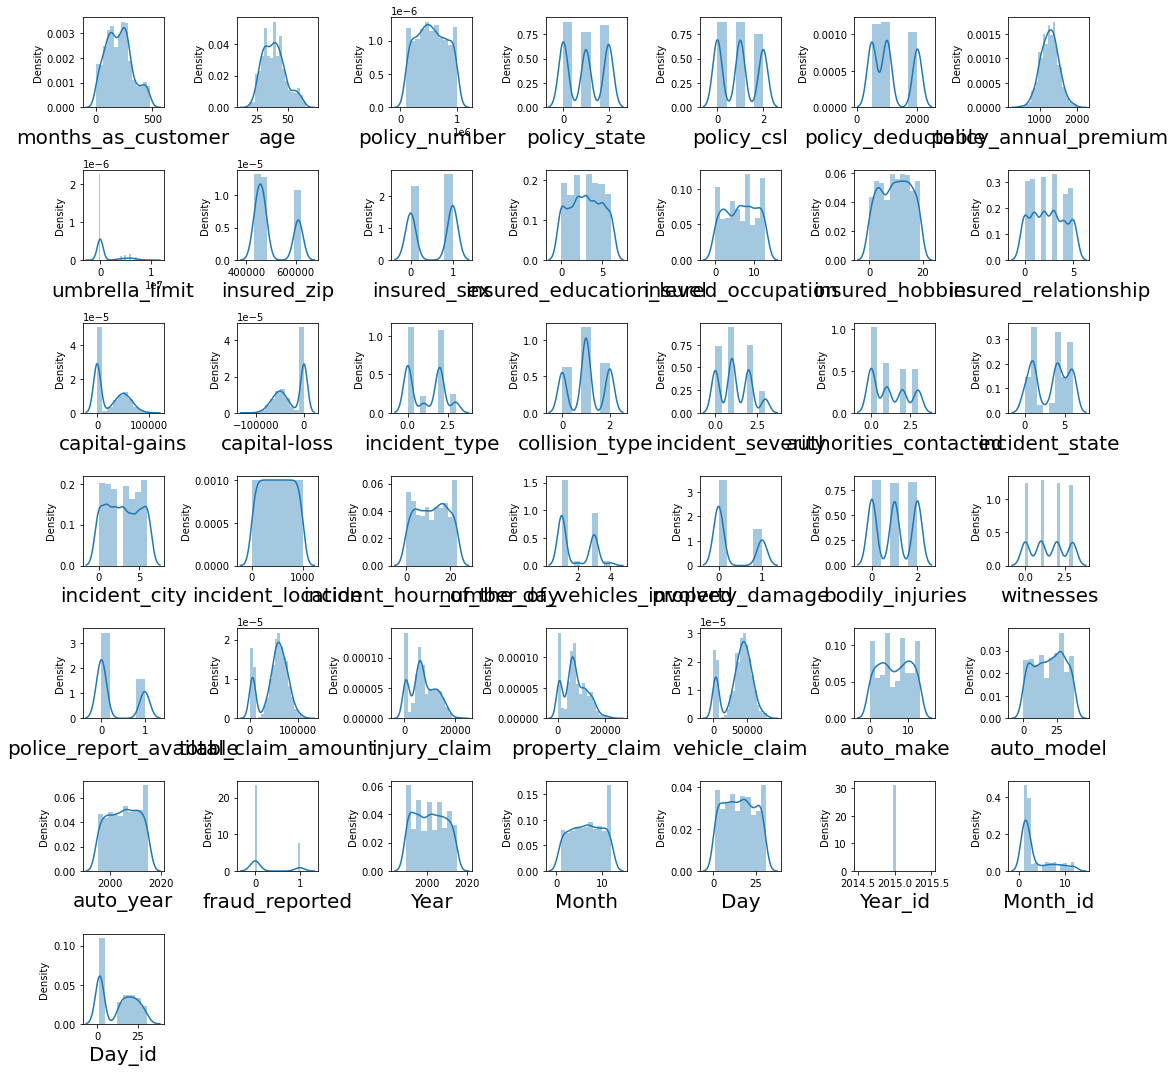

In [53]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=49:
        ax = plt.subplot(7,7,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [54]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                   0.026177
policy_csl                     0.092720
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                   -0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted          0.364346
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


In [55]:
skew = ['umbrella_limit','insured_zip','capital-loss',
       'vehicle_claim',]

Seen no normal distribution in the above mentioned 4 columns so to make it as normally distributed will use power transformer 
and will treat skewness

In [56]:
# Removing Skewness Using Power Transformer
from sklearn.preprocessing import PowerTransformer

In [57]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [58]:
df[skew] = scaler.fit_transform(df[skew].values)

In [59]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                   0.026177
policy_csl                     0.092720
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                -7.865930
insured_zip                    0.000000
insured_sex                   -0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                   0.090488
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted          0.364346
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


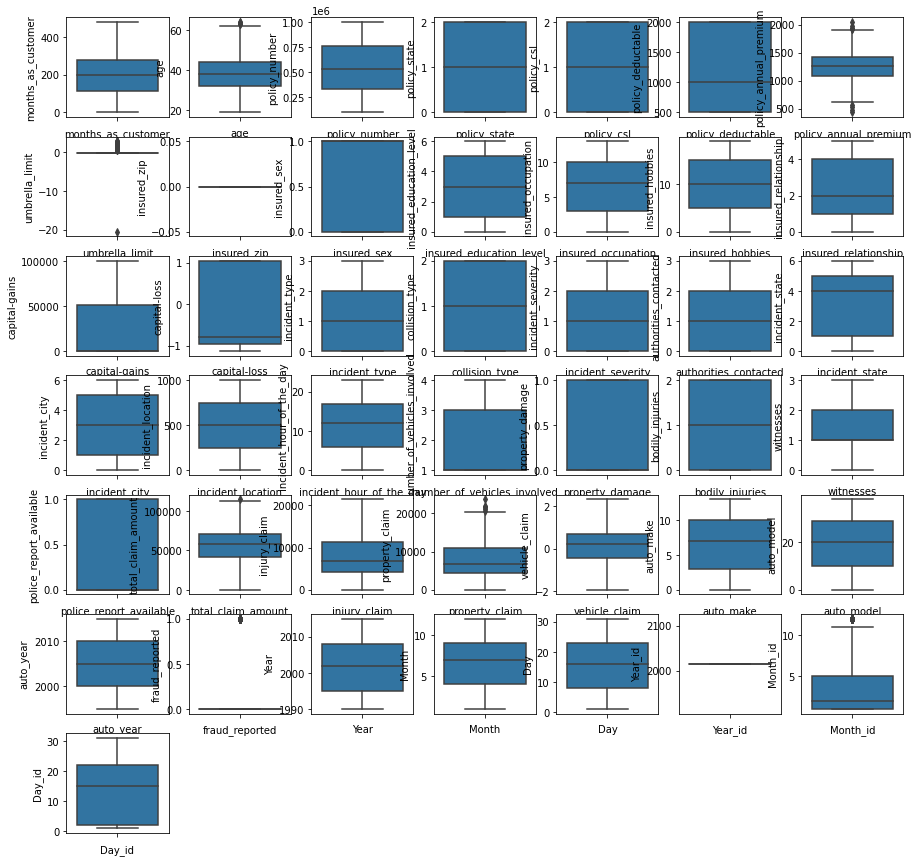

In [60]:
# Let's check outliers 
plt.figure(figsize=(15,15))

graph=1

for column in df.columns:
    if graph<=49:
        ax = plt.subplot(7,7,graph)
        sns.boxplot(y=df[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

No outliers found in continous columns so not doing anything for outliers here

In [61]:
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Year,Month,Day,Year_id,Month_id,Day_id
months_as_customer,1.000000,0.922098,0.057555,0.000328,-0.008876,0.026807,0.005018,-0.003277,NaN,-0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.014228,-0.017377,-0.072787,-0.059581,-0.013186,0.005369,-0.000130,-0.013630,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061308,0.047655,0.004202,-0.000292,0.020544,-0.048276,0.005750,0.051728,NaN,0.024659,-0.011092
age,0.922098,1.000000,0.059413,0.014533,-0.009876,0.029188,0.014404,0.005086,NaN,-0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,-0.000593,-0.025626,-0.075642,-0.058439,-0.011256,0.005770,-0.002291,-0.011101,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062764,0.030410,0.017343,0.001354,0.012143,-0.037444,0.015501,0.053869,NaN,0.023404,-0.006131
policy_number,0.057555,0.059413,1.000000,-0.072815,-0.045590,-0.006738,0.022566,0.007195,NaN,-0.004564,-0.037264,-0.014422,0.039896,0.017120,0.009802,-0.001711,0.001742,-0.003338,-0.015719,-0.063129,-0.010064,-0.035406,0.016393,0.000113,0.013432,-0.019923,-0.004558,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020981,0.023860,0.065240,-0.000183,-0.029443,-0.040099,0.005509,0.041885,NaN,-0.042512,0.057199
policy_state,0.000328,0.014533,-0.072815,1.000000,0.028838,-0.010033,-0.012455,0.044939,NaN,-0.020481,0.034327,0.031215,0.038689,0.018506,-0.074551,0.030741,-0.031848,-0.052438,0.026377,0.003035,-0.008723,0.002077,-0.029534,-0.029457,0.042263,0.008465,-0.013384,-0.022960,-0.069017,0.006002,0.046290,-0.008406,-0.001464,-0.017124,0.025253,-0.002114,-0.029432,0.007276,-0.071450,-0.002277,NaN,-0.023643,-0.014745
policy_csl,-0.008876,-0.009876,-0.045590,0.028838,1.000000,0.003931,-0.003813,-0.014386,NaN,0.070700,0.006546,0.003804,-0.036946,0.043769,-0.001635,-0.030683,0.006631,0.017275,-0.003459,-0.011279,-0.004413,0.025689,-0.000247,-0.005211,-0.005135,-0.009732,0.016047,0.012116,-0.056154,0.012008,-0.007745,0.013888,0.015989,0.032594,0.007946,-0.033820,-0.041475,-0.002903,-0.031318,-0.011112,NaN,0.023041,-0.022334
policy_deductable,0.026807,0.029188,-0.006738,-0.010033,0.003931,1.000000,-0.003245,0.027891,NaN,0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.036013,-0.038411,-0.053912,-0.015711,-0.003771,0.006517,-0.045117,-0.009281,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.004875,-0.035379,-0.003268,0.026105,0.014817,-0.049598,-0.050416,0.009164,NaN,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.022566,-0.012455,-0.003813,-0.003245,1.000000,-0.011073,NaN,-0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.007252,0.053603,0.036556,-0.011155,0.034431,0.046434,0.048724,0.017883,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020028,0.000045,-0.031849,-0.049226,-0.014480,0.001249,-0.035355,-0.025183,NaN,0.021559,0.014835
umbrella_limit,-0.003277,0.005086,0.007195,0.044939,-0.014386,0.027891,-0.011073,1.000000,NaN,0.012645,0.015542,0.020480,-0.032383,0.030416,-0.017566,-0.042019,-0.001785,-0.018098,0.031263,-0.037431,-0.028611,0.038639,0.022353,-0.020970,-0.000839,-0.089215,0.044565,0.003093,-0.021804,-0.061700,-0.038951,-0.057653,-0.062575,0.015663,0.019138,0.037638,0.056130,0.055605,0.021643,-0.010548,NaN,0.046847,-0.048549
insured_zip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [62]:
df.drop(columns=['insured_zip'],inplace=True)

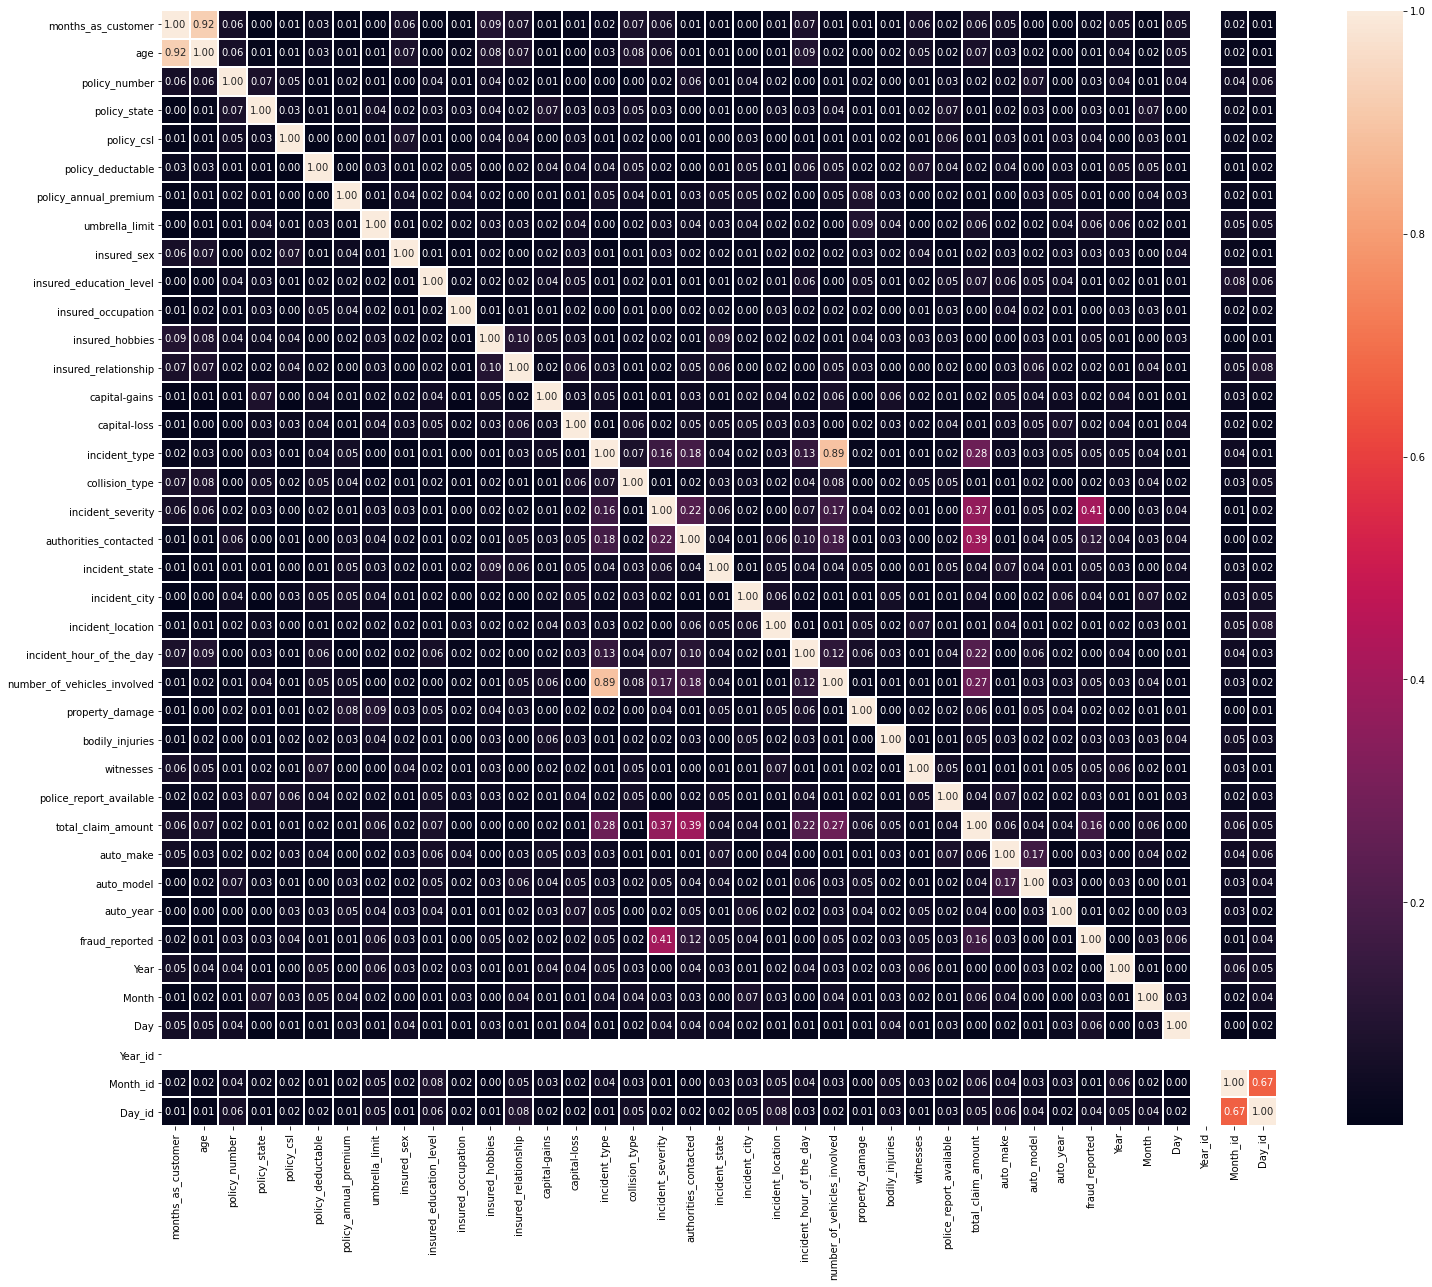

In [70]:
# Plotting the heatmap of cprrelation between features
df_corr = df.corr().abs()
plt.figure(figsize=(25,25))

sns.heatmap(df_corr, cbar=True, square=True, cbar_kws={'shrink':.82},fmt='.2f', annot=True, annot_kws={'size':10},linewidths= True)
plt.show()

Few columns which we found as multicollinear being deleted .No multicollinearity among any feature 

In [72]:
# Splitting feature and target into x and y respectively
x = df.drop('fraud_reported',axis = 1)
y = df.fraud_reported

here our feature is x and label is y

In [78]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()


In [79]:
x1,y1 = sm.fit_resample(x,y)

In [80]:
y1.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

Data being balanced by using smote as we did oversampling here

# Preprocessing and model building

In [81]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x1)
x_scaler

array([[ 1.09446278,  1.01682745, -0.06917179, ...,  0.        ,
        -0.7563683 ,  1.2475778 ],
       [ 0.18472106,  0.33919246, -0.76191596, ...,  0.        ,
        -0.7563683 ,  0.8414712 ],
       [-0.67043616, -1.12901669,  0.57471665, ...,  0.        ,
        -0.43477297,  0.94299785],
       ...,
       [-1.20718377, -1.35489502, -1.16040171, ...,  0.        ,
        -0.7563683 ,  0.94299785],
       [-0.29744205, -0.1125642 , -1.1964078 , ...,  0.        ,
        -0.11317764,  0.02925801],
       [-0.57036457, -0.67726003, -1.34618058, ...,  0.        ,
         0.85160835, -0.57990188]])

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

In [83]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    acc = accuracy_score(y1_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)
        

Best Accuracy score is: 0.8738938053097345 On Random state:  256


In [84]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler,y1,random_state=i,test_size=0.30)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [86]:
DTC = DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred = DTC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       238
           1       0.77      0.84      0.80       214

    accuracy                           0.80       452
   macro avg       0.80      0.81      0.80       452
weighted avg       0.81      0.80      0.80       452



In [87]:
print(cross_val_score(DTC,x1,y1,cv=5).mean())

0.8194627180920111


In [88]:
RFC = RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred =RFC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       238
           1       0.85      0.86      0.86       214

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452



In [89]:
print(cross_val_score(RFC,x1,y1,cv=5).mean())

0.8619810345206925


In [90]:
SV = SVC()
SV.fit(x1_train,y1_train)
pred = SV.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       238
           1       0.84      0.79      0.81       214

    accuracy                           0.83       452
   macro avg       0.83      0.83      0.83       452
weighted avg       0.83      0.83      0.83       452



In [91]:
print(cross_val_score(SV,x1,y1,cv=5).mean())

0.5683945347737124


Best model performance was RandomForestclassifier so doing hyperparameter tuning for the same

# Hyperparameter Tuning

In [94]:
# RandomForestClassifier
param = {'n_estimators':[100,200,400,800],
        'criterion':['gini','entropy'],
        'max_depth':[10,20,30,40],
        'max_features':['auto','sqrt','log2']}

In [93]:
GC = GridSearchCV(RFC,param,cv=5)

In [95]:
GC.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500, 700]})

In [96]:
GC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [103]:
final_rfc = RandomForestClassifier(criterion = 'gini',max_depth = 8, max_features = 'auto',n_estimators = 100)
final_rfc.fit(x1_train,y1_train)
pred = final_rfc.predict(x1_test)
acc = accuracy_score(pred,y1_test)
print(acc*100)

85.17699115044249


# Save the model

In [104]:
import joblib
joblib.dump(final_rfc,'Finalmodelinsuarance claim.pk1')

['Finalmodelinsuarance claim.pk1']